In [1]:
import pandas as pd

In [2]:
github_url = 'https://raw.githubusercontent.com/marymorkos/maternalmortalityhealthriskdata/main/Maternal%20Health%20Risk%20Data%20Set%204.csv'
maternal_df = pd.read_csv(github_url)

In [3]:
print(maternal_df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [4]:
print(maternal_df.dtypes)

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object


In [5]:
print(maternal_df.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [6]:
print(maternal_df.duplicated().sum())

562


In [7]:
print(maternal_df.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [8]:
float_columns = ['BS', 'BodyTemp']
maternal_df[float_columns] = maternal_df[float_columns].astype(int)

maternal_df['RiskLevel'].replace({'low': 1, 'mid': 2, 'high': 3}, inplace=True)

# KNN

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
X = maternal_df.drop(columns=['RiskLevel'])
y = maternal_df['RiskLevel']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test_scaled)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6157635467980296


# PCA

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
X = maternal_df.drop(columns=['RiskLevel'])
y = maternal_df['RiskLevel']

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

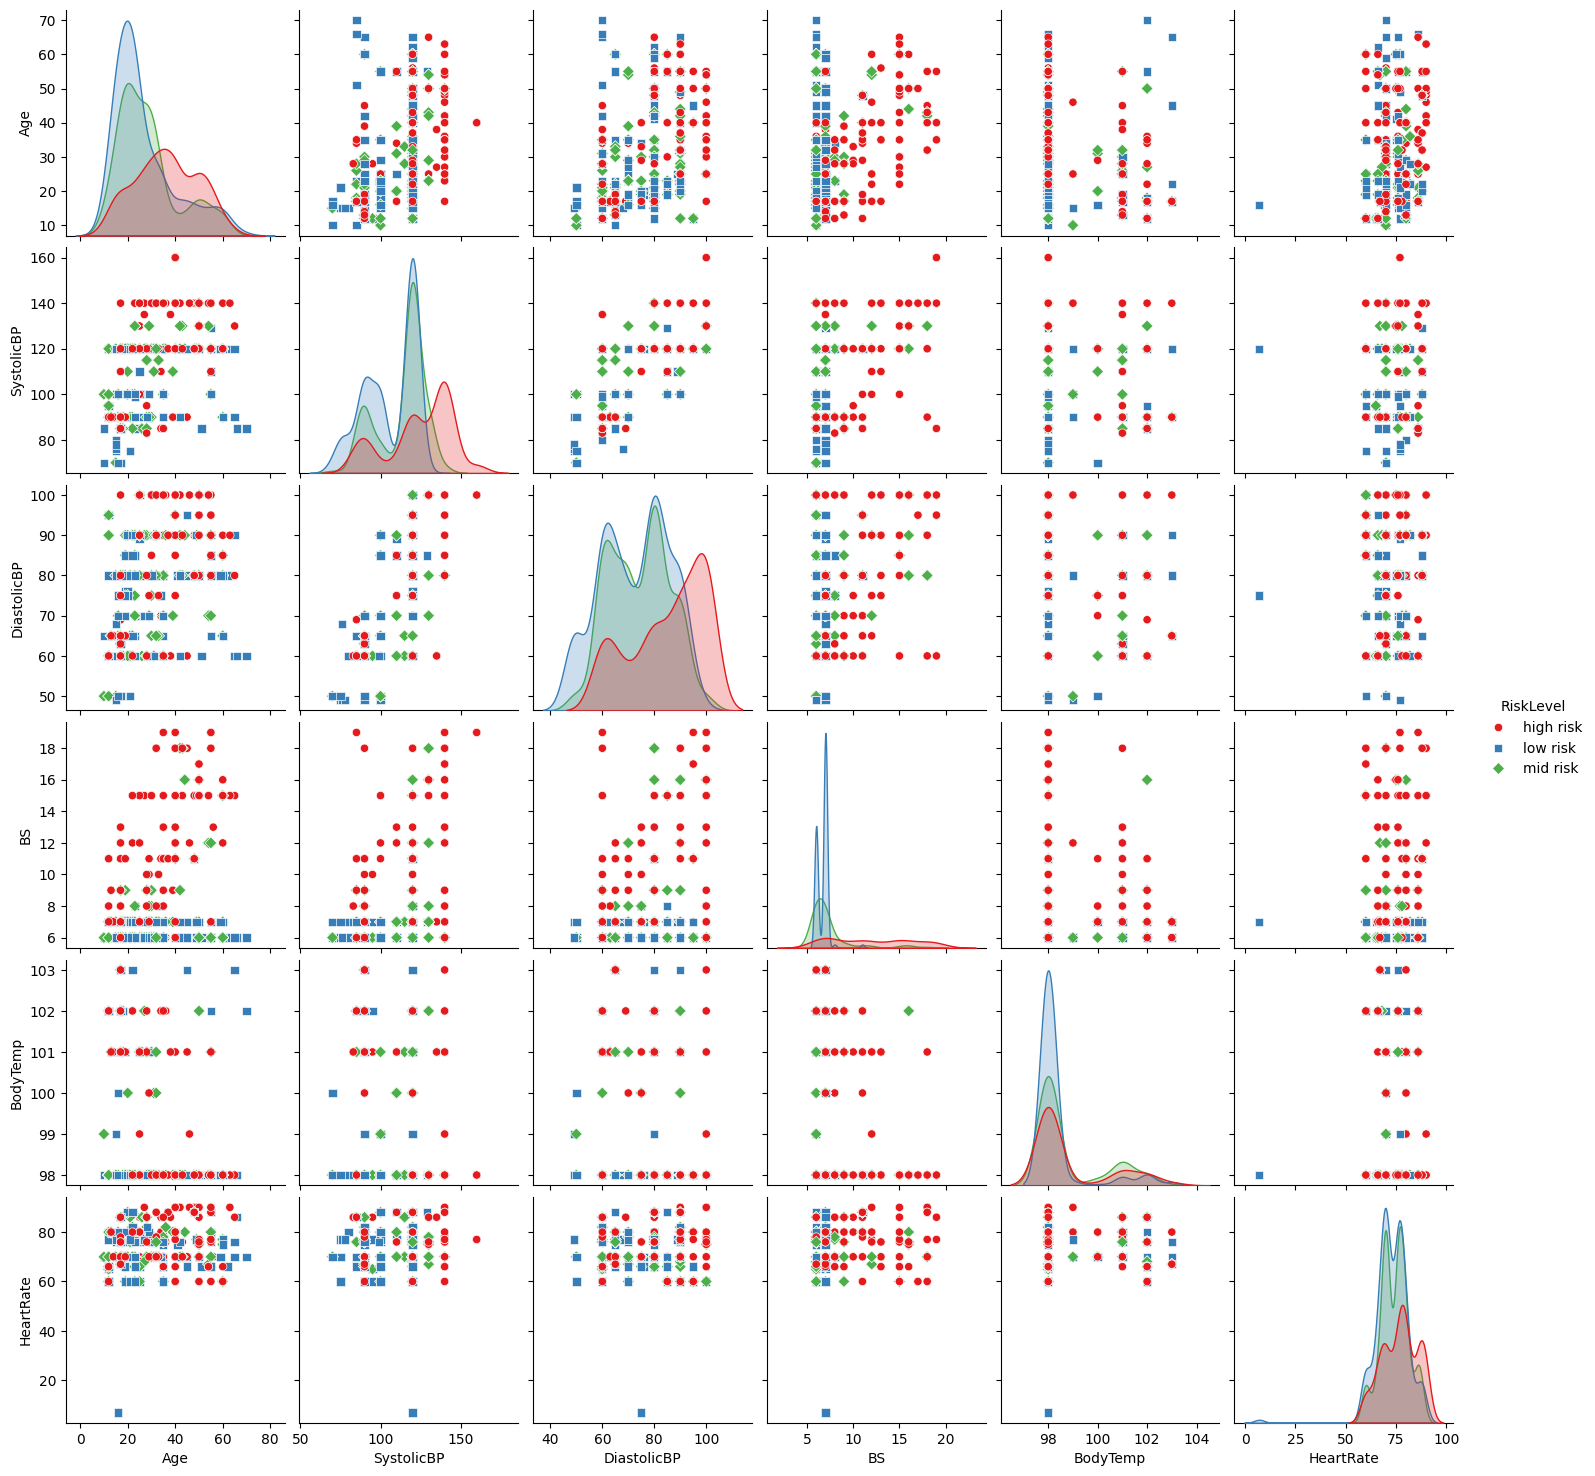

In [27]:
sns.pairplot(maternal_df, hue='RiskLevel', markers=["o", "s", "D"], palette="Set1")
plt.show()

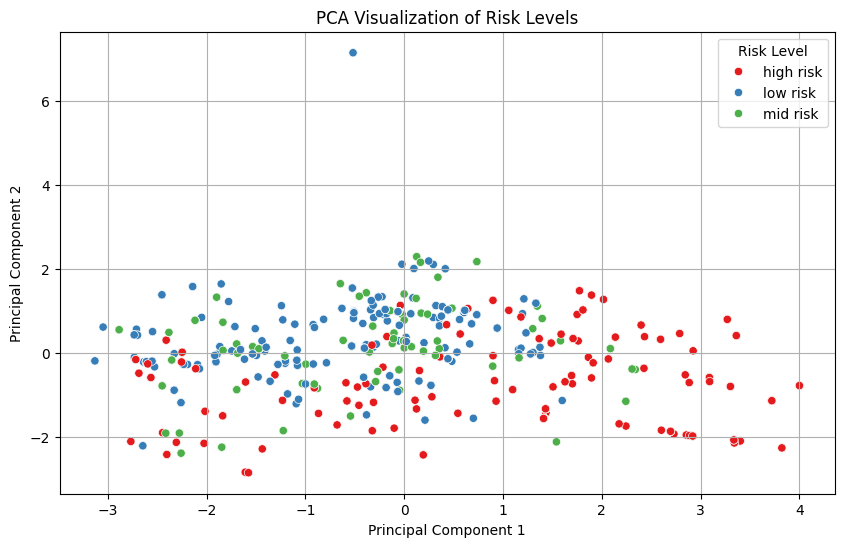

Accuracy: 0.6157635467980296


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = maternal_df.drop(columns=['RiskLevel'])
y = maternal_df['RiskLevel']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['RiskLevel'] = y

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='RiskLevel', palette='Set1', markers=["o", "s", "D"])
plt.title('PCA Visualization of Risk Levels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Risk Level')
plt.grid(True)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Linear Regression

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [45]:
maternal_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15,98,86,high risk
1,35,140,90,13,98,70,high risk
2,29,90,70,8,100,80,high risk
3,30,140,85,7,98,70,high risk
4,35,120,60,6,98,76,low risk


In [61]:
X = maternal_df.drop(columns=['RiskLevel'])

In [62]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(maternal_df['RiskLevel'])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.6595912891051892


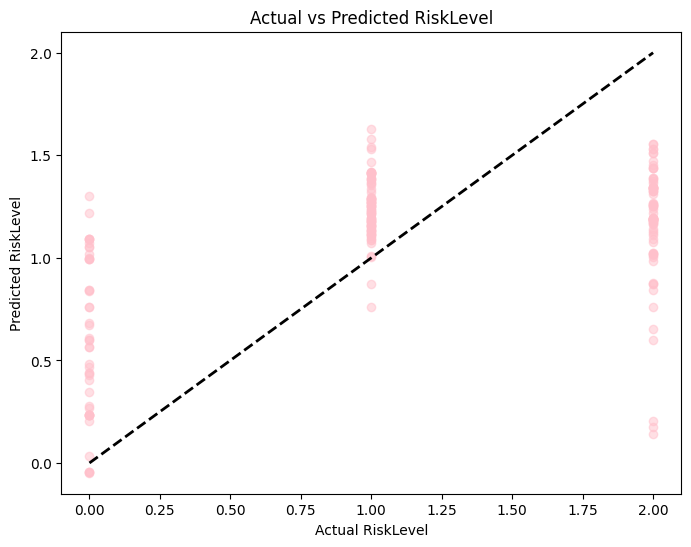

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='pink', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual RiskLevel')
plt.ylabel('Predicted RiskLevel')
plt.title('Actual vs Predicted RiskLevel')
plt.show()

In [70]:
X = maternal_df[['Age']]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(maternal_df['RiskLevel'])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)

In [74]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.755122134918198


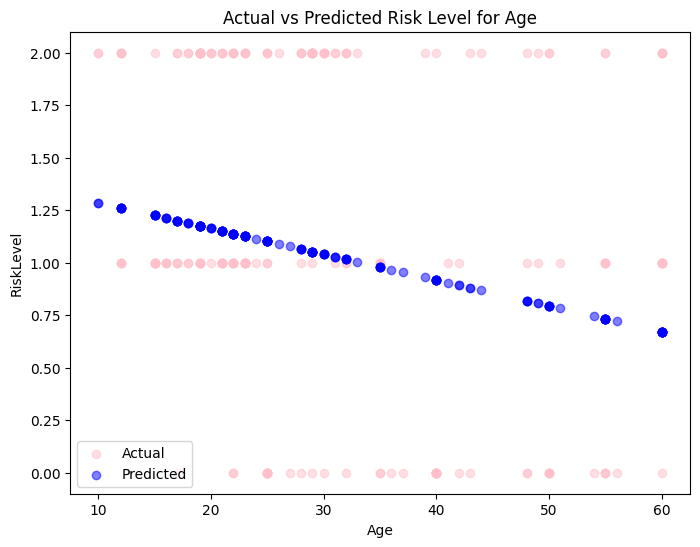

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='pink', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, color='blue', label='Predicted', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('RiskLevel')
plt.title('Actual vs Predicted Risk Level for Age')
plt.legend()
plt.show()

# Logistic Regression

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

In [81]:
X = maternal_df.drop(columns=['RiskLevel'])
y = maternal_df['RiskLevel']

In [82]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
log_reg_model = LogisticRegression(max_iter=100)
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
y_pred = log_reg_model.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6502463054187192


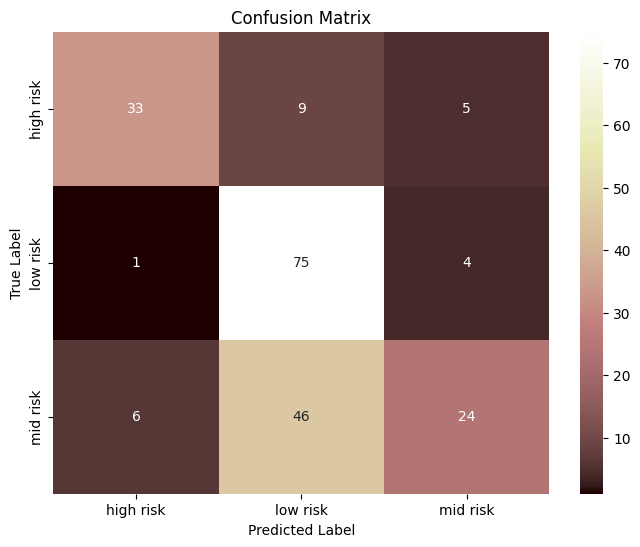

In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Neural Network

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [95]:
X = maternal_df.drop(columns=['RiskLevel'])
y = maternal_df['RiskLevel']

In [96]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
model = Sequential()

In [99]:
model.add(Dense(16, activation='relu'))

In [100]:
model.add(Dense(3, activation='softmax'))

In [101]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [102]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
26/26 [==============================] - 1s 13ms/step - loss: 18.5829 - accuracy: 0.3206 - val_loss: 9.6983 - val_accuracy: 0.3744
Epoch 2/50
26/26 [==============================] - 0s 3ms/step - loss: 6.3311 - accuracy: 0.3354 - val_loss: 2.3565 - val_accuracy: 0.4138
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 2.5193 - accuracy: 0.3305 - val_loss: 1.6055 - val_accuracy: 0.4187
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 1.9525 - accuracy: 0.3785 - val_loss: 1.4904 - val_accuracy: 0.4089
Epoch 5/50
26/26 [==============================] - 0s 5ms/step - loss: 1.6999 - accuracy: 0.3909 - val_loss: 1.4596 - val_accuracy: 0.4089
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 1.5136 - accuracy: 0.4464 - val_loss: 1.3717 - val_accuracy: 0.3990
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 1.3822 - accuracy: 0.4513 - val_loss: 1.2460 - val_accuracy: 0.4236
Epoch 8/50
26/26 [

In [103]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

7/7 [==============================] - 0s 3ms/step - loss: 0.8183 - accuracy: 0.6108
Accuracy: 0.610837459564209


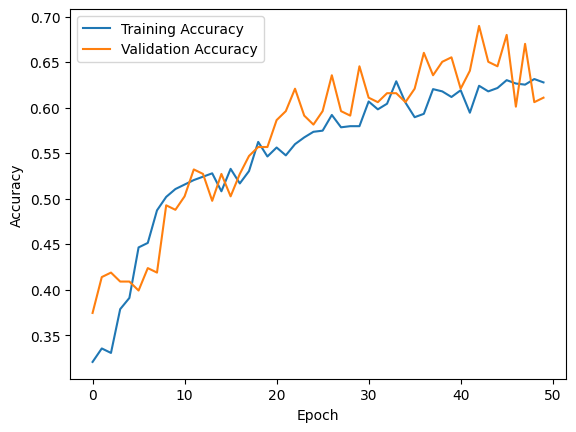

In [104]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Classification Tree

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [106]:
X = maternal_df.drop(columns=['RiskLevel'])
y = maternal_df['RiskLevel']

In [107]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
clf = DecisionTreeClassifier(random_state=42)

In [110]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [111]:
y_pred = clf.predict(X_test)

In [112]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7783251231527094


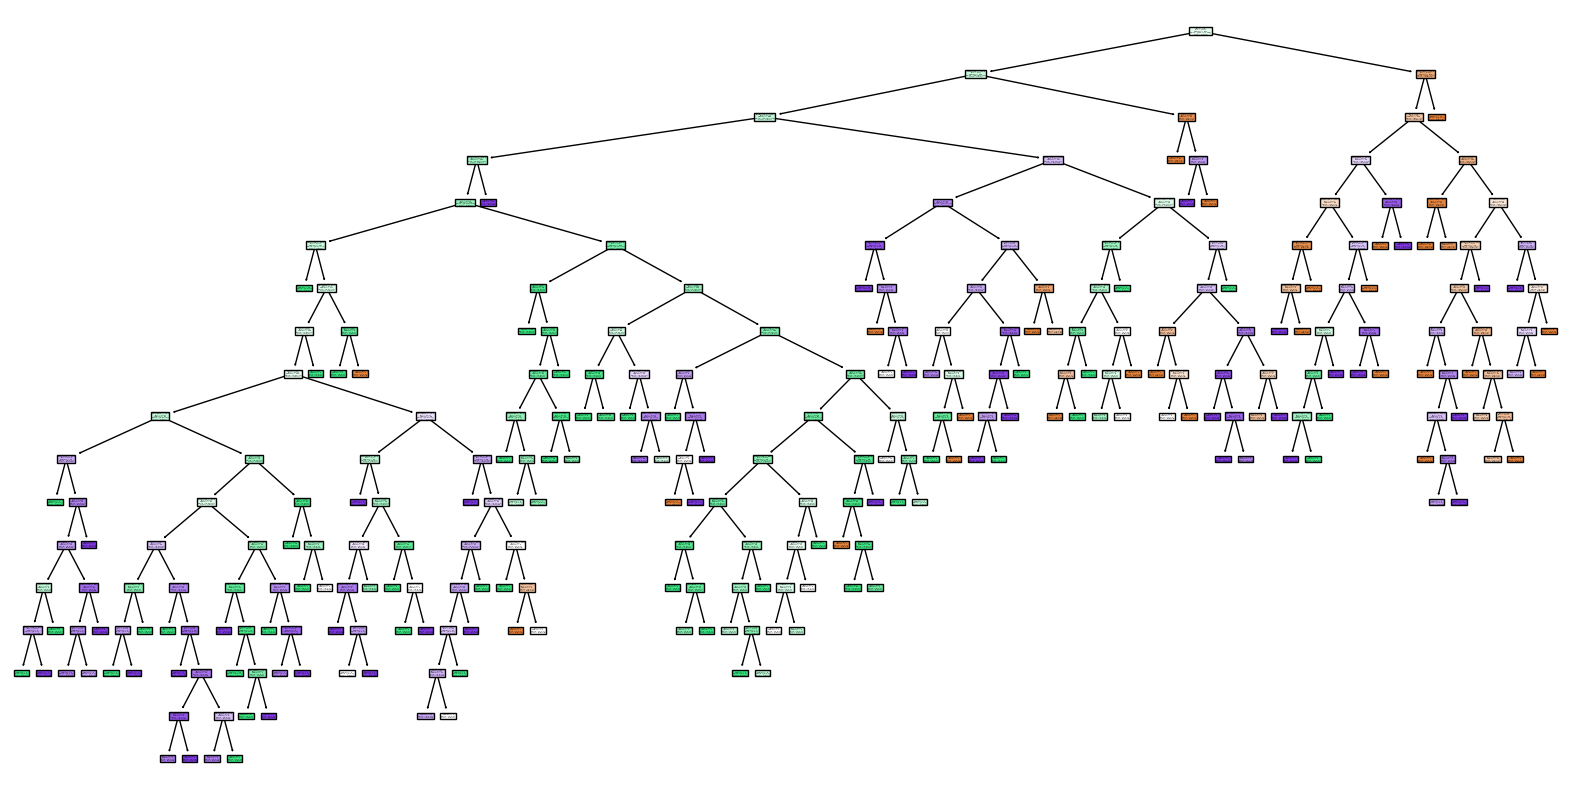

In [113]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()

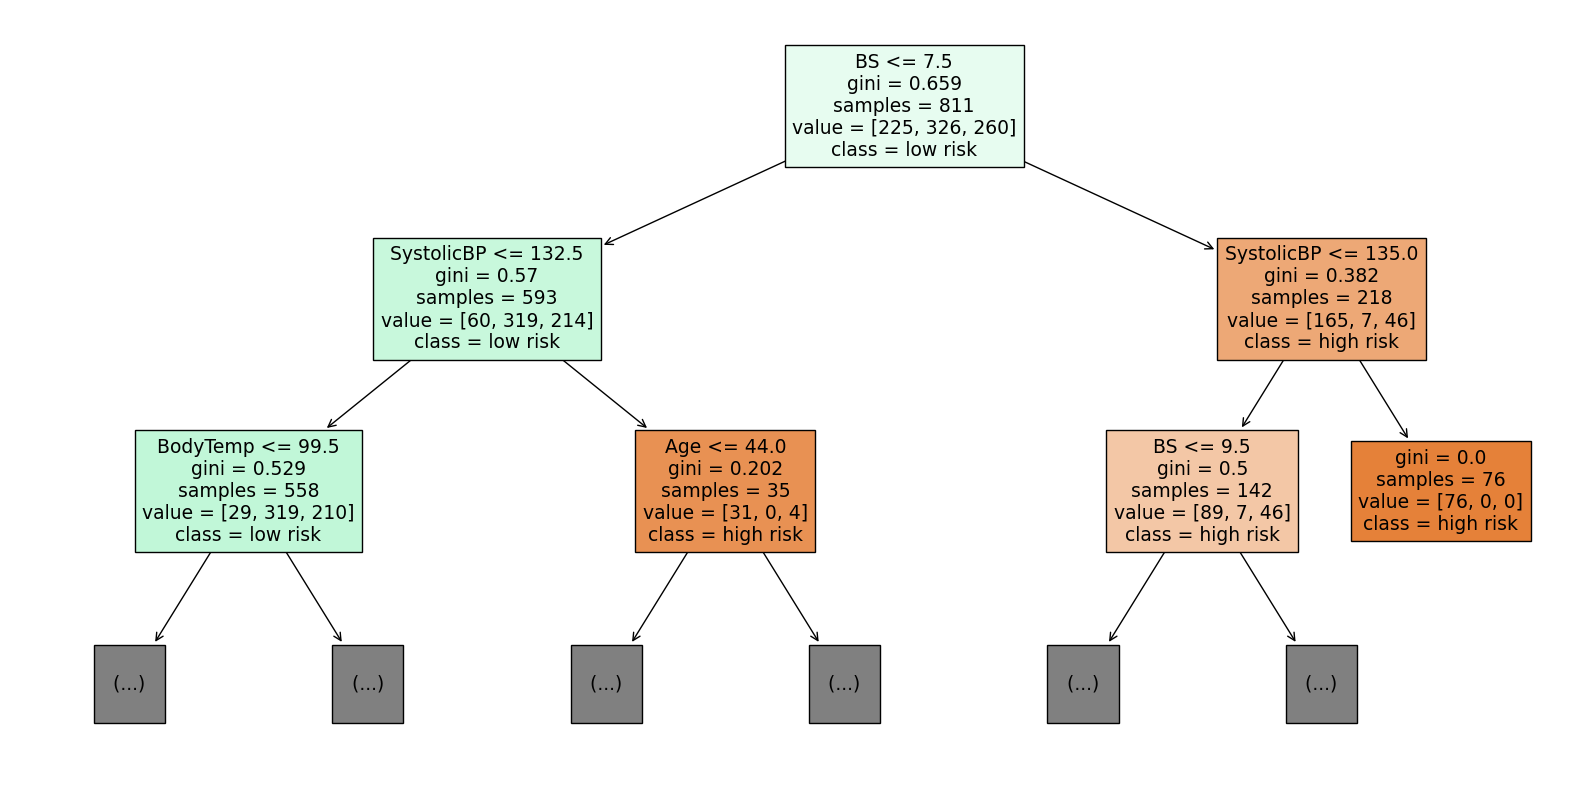

In [115]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, max_depth=2)
plt.show()

# Time Series joke

In [117]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [118]:
age_series = maternal_df['Age']

Mean Squared Error: 206.94963444347485


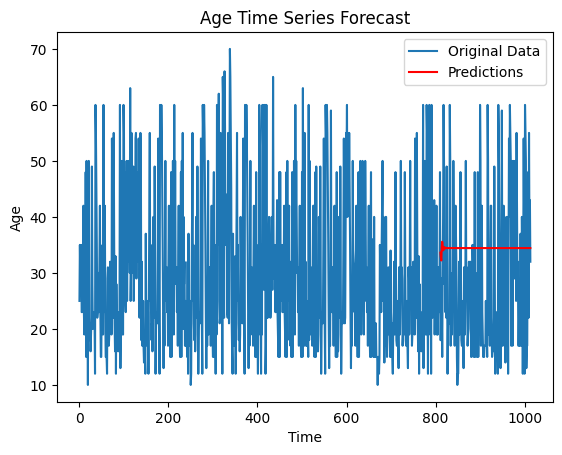

In [119]:
train_size = int(len(age_series) * 0.8)
train_data, test_data = age_series[:train_size], age_series[train_size:]

model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test_data))

mse = mean_squared_error(test_data, predictions)
print("Mean Squared Error:", mse)

plt.plot(age_series, label='Original Data')
plt.plot(test_data.index, predictions, color='red', label='Predictions')
plt.xlabel('Time')
plt.ylabel('Age')
plt.title('Age Time Series Forecast')
plt.legend()
plt.show()

# Correlation Matrix

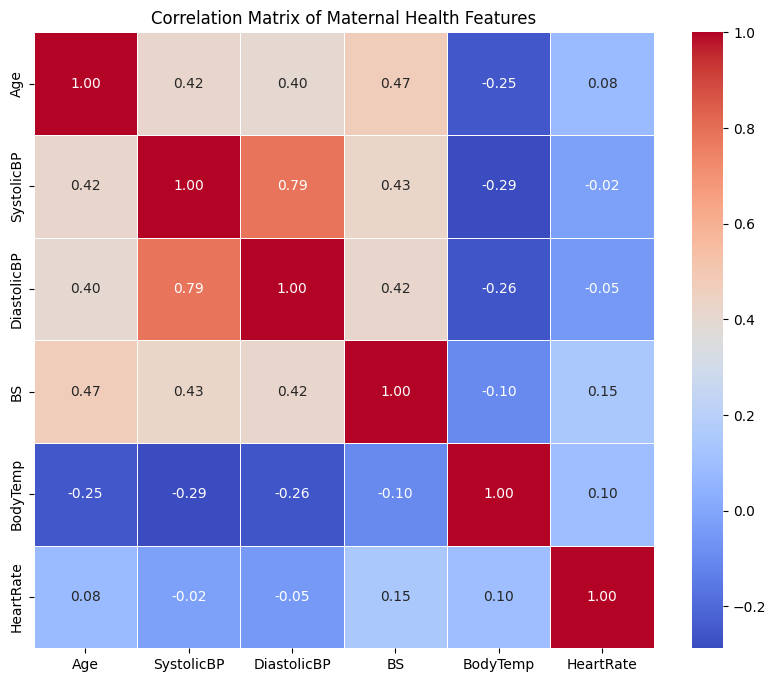

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

maternal_df_numeric = maternal_df.drop(columns=['RiskLevel'])

correlation_matrix = maternal_df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Maternal Health Features')
plt.show()

In [127]:
# Extract upper triangle of correlation matrix (excluding diagonal)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find the most correlated pairs
most_correlated_pairs = upper_triangle.unstack().sort_values(ascending=False)

# Print the most correlated pairs
print("Most correlated pairs of features:")
print(most_correlated_pairs.head(10))


Most correlated pairs of features:
DiastolicBP  SystolicBP     0.787006
BS           Age            0.470238
             SystolicBP     0.425538
             DiastolicBP    0.416393
SystolicBP   Age            0.416045
DiastolicBP  Age            0.398026
HeartRate    BS             0.150125
             BodyTemp       0.099276
             Age            0.079798
             SystolicBP    -0.023108
dtype: float64
